In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Ex 1

In [2]:
def loadIris():
    f = open("iris.csv", "r")
    lines = f.readlines()
    D = []
    L = []

    for line in lines:
        fields = line.split(",")
        type = fields[4].strip("\n")
        if(type == "Iris-setosa"):
            L.append(0)
        elif(type == "Iris-versicolor"):
            L.append(1)
        else:
            L.append(2)
        D.append(fields[0:4])


    f.close()
    return (np.array(D, dtype=np.float64).T, np.array(L, dtype=np.int32))

In [3]:
(D, L) = loadIris()

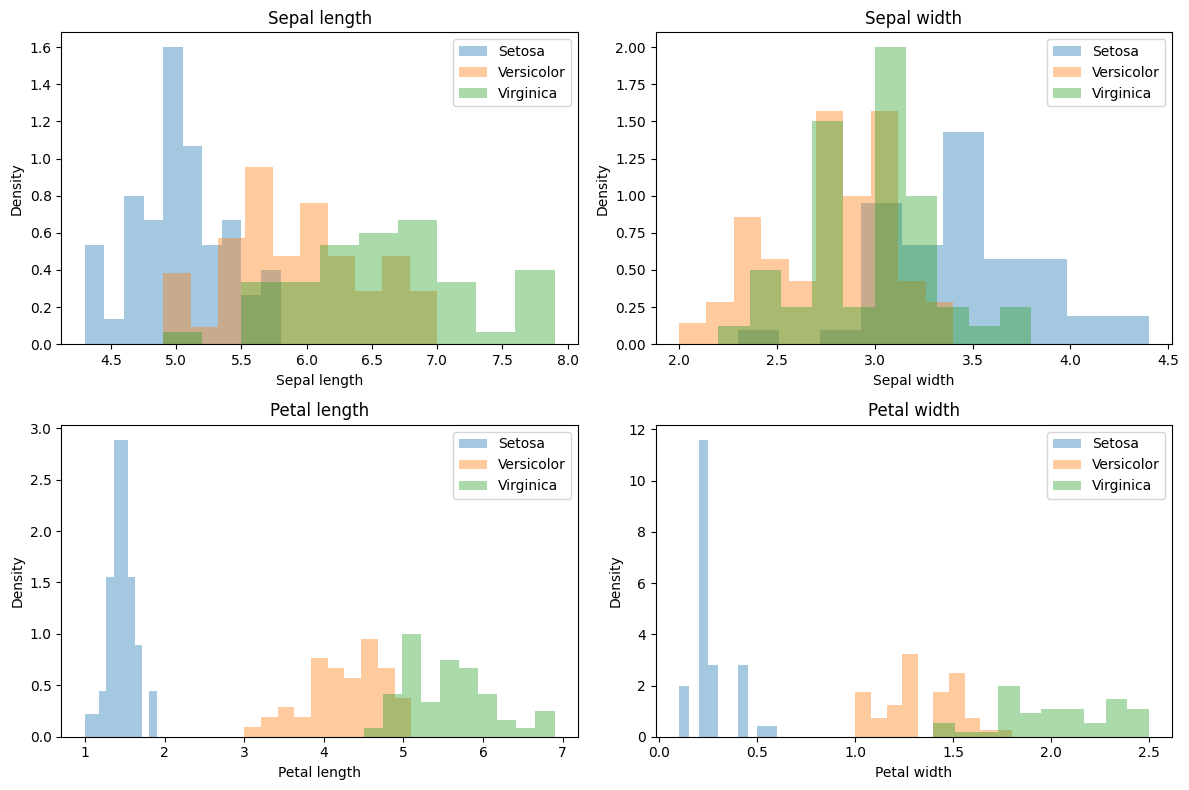

In [ ]:

labels = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
colors = ["red", "orange", "lightgreen"]
leg = ["Setosa", "Versicolor", "Virginica"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 righe, 2 colonne

for i, ax in enumerate(axes.flat):
    ax.set_title(labels[i])  # Aggiunge il titolo con il nome della feature
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Density")
    
    for j in range(3):
        ax.hist(D[i, L == j], bins=10, density=True, alpha=0.4, label=leg[j])
    
    ax.legend()

plt.tight_layout()
plt.show()


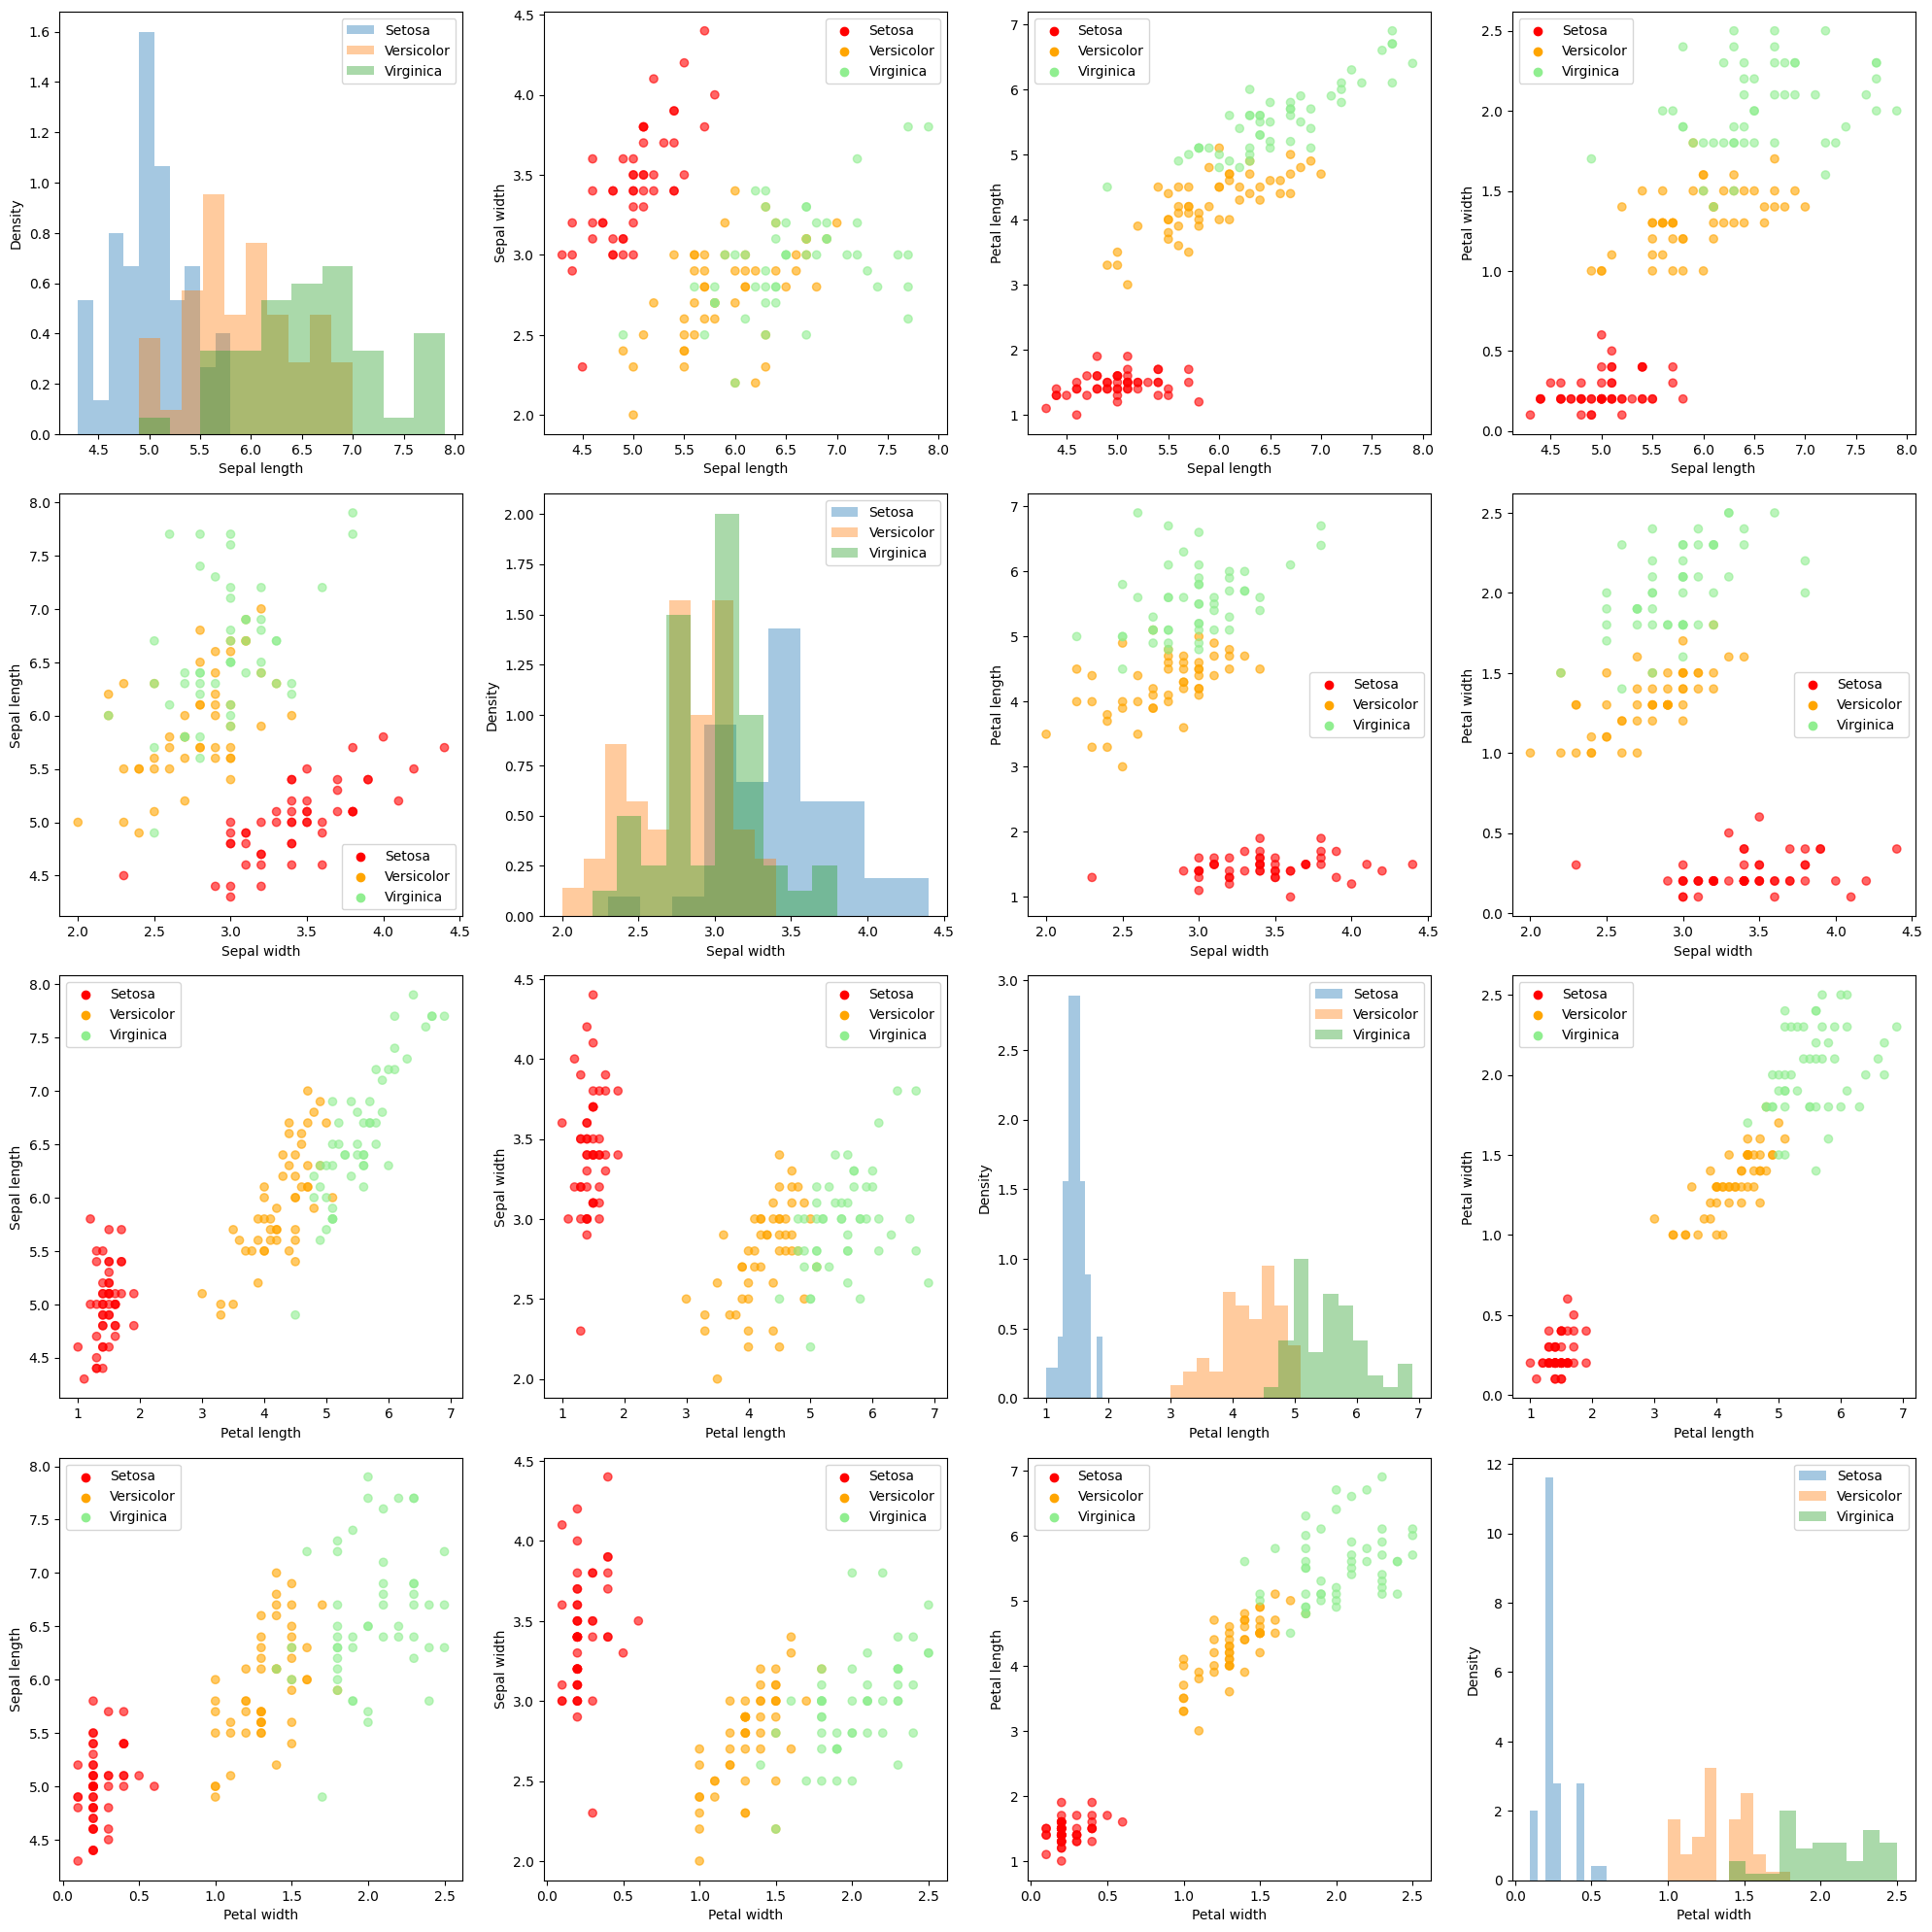

In [42]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4 righe, 4 colonne

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i, j].scatter(D[i, :], D[j, :], c=L, cmap=mpl.colors.ListedColormap(colors), alpha=0.6)
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel(labels[j])
            # add legend to scatter plot with the values of leg array
            for k in range(3):
                axes[i, j].scatter([], [], c=colors[k], label=leg[k])
        else:
            for k in range(3):
                axes[i, j].hist(D[i, L == k], bins=10, density=True, alpha=0.4, label=leg[k])
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel("Density")
        axes[i, j].legend()

plt.tight_layout()
plt.show()

## Dataset mean

In [ ]:
# slow method

mu=0

for i in range(D.shape[1]):
    mu += D[:, i:i+1]
mu /= D.shape[1]

print("Media: ")
print(mu)

Media: 
[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


In [61]:
# faster method, using numpy.mean
mu = D.mean(1).reshape(D.shape[0], 1)
print("Media: ")
print(mu)

# We now exploit broadcasting to center the data, i.e. to remove the mean from all points:
DC = D - mu

Media: 
[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


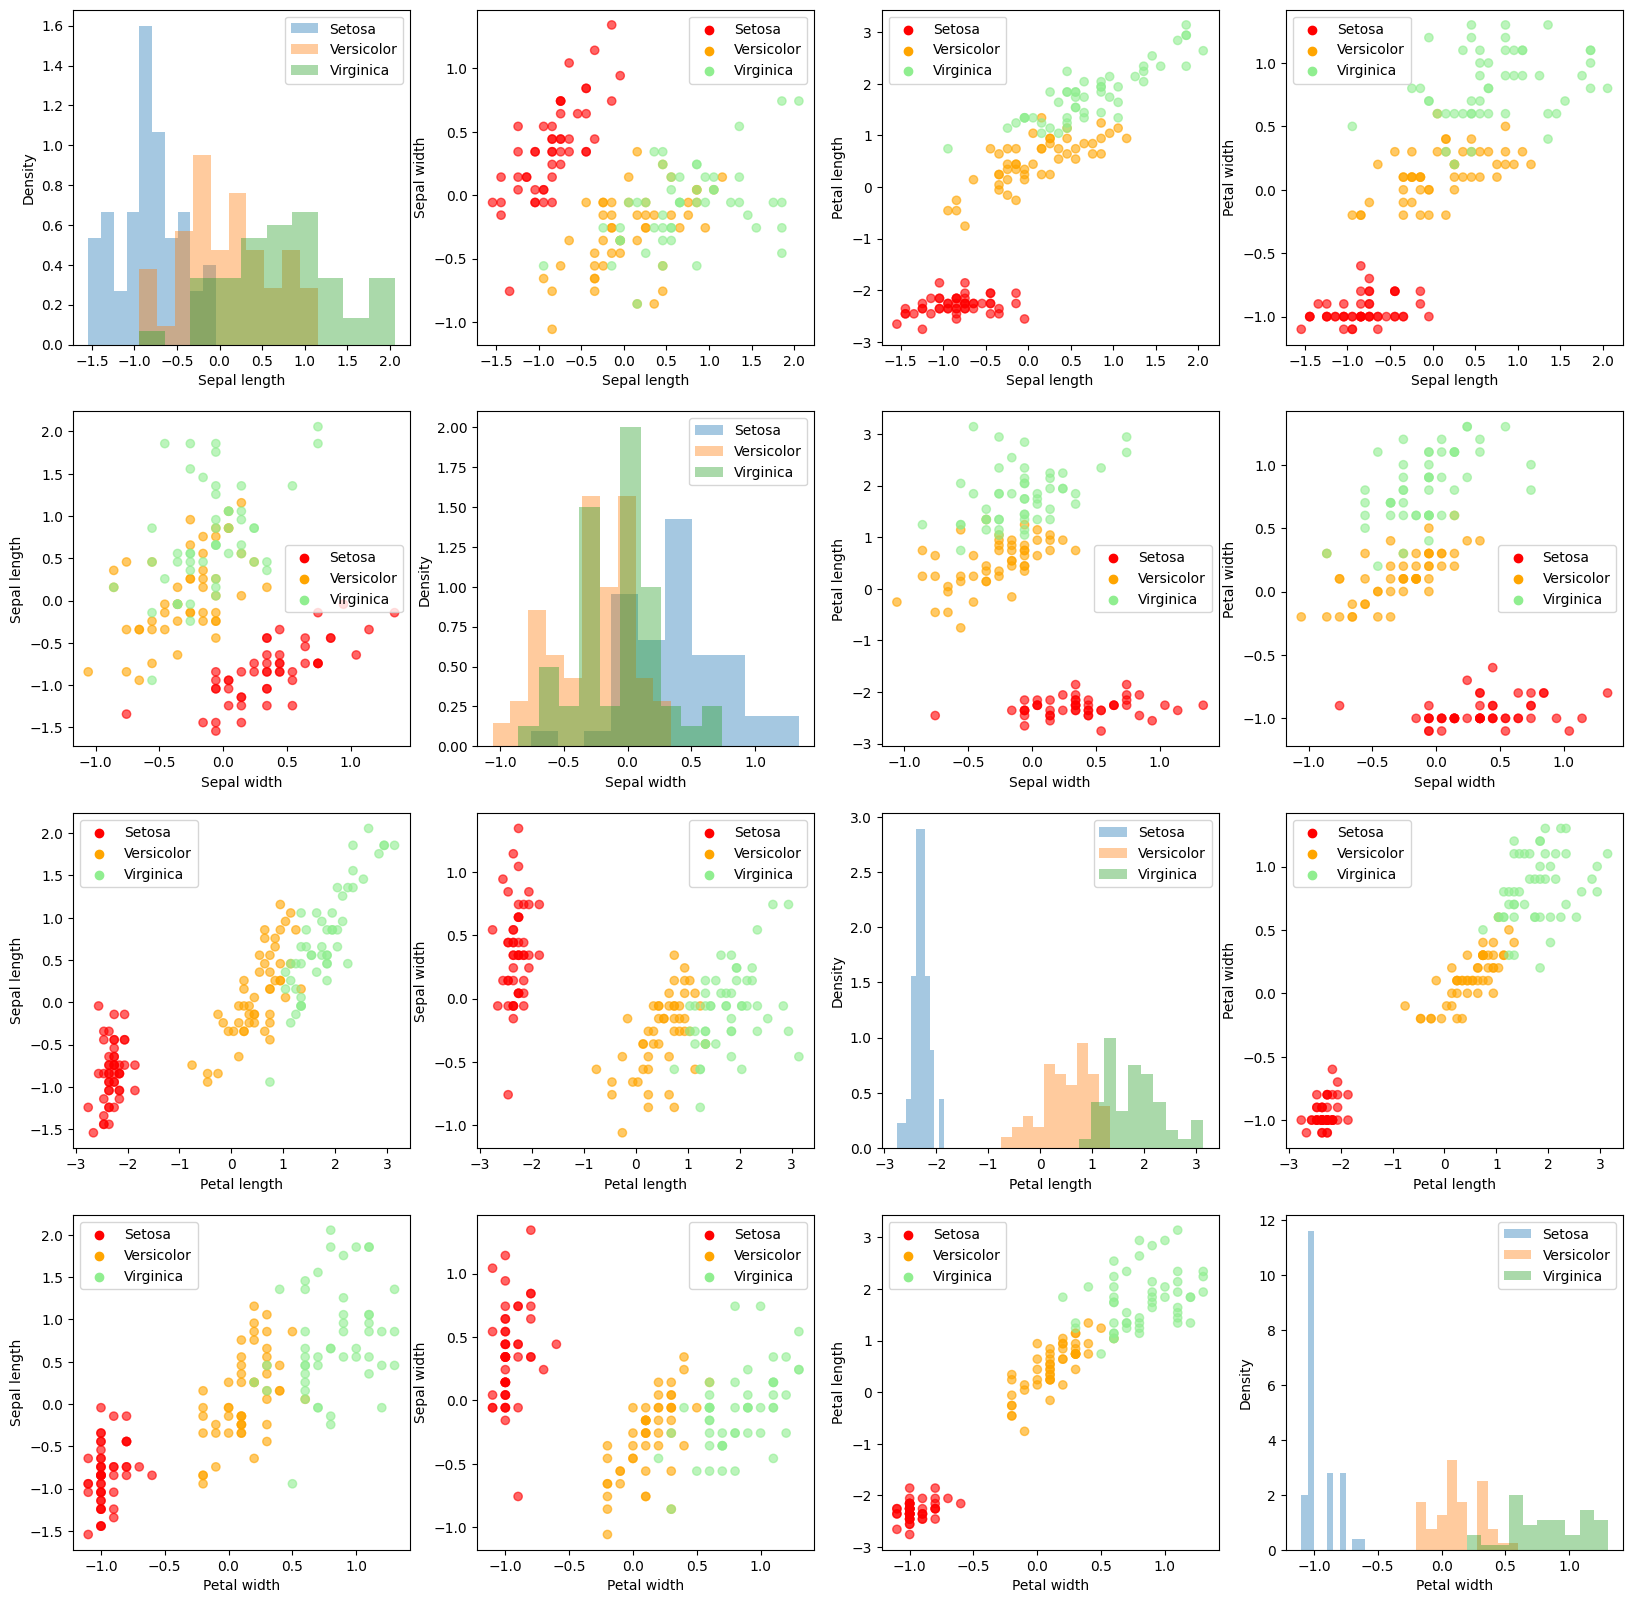

In [63]:
# centered data can be plotted again
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4 righe, 4 colonne

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i, j].scatter(DC[i, :], DC[j, :], c=L, cmap=mpl.colors.ListedColormap(colors), alpha=0.6)
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel(labels[j])
            # add legend to scatter plot with the values of leg array
            for k in range(3):
                axes[i, j].scatter([], [], c=colors[k], label=leg[k])
        else:
            for k in range(3):
                axes[i, j].hist(DC[i, L == k], bins=10, density=True, alpha=0.4, label=leg[k])
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel("Density")
        axes[i, j].legend()


In [66]:
# variance matrix:
C = (DC @ DC.T) / float(D.shape[1])
print("Covariance matrix: ")
print(C)

Covariance matrix: 
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [ ]:
var = D.var(1)
std = D.std(1)

# reshape to column vector
var = var.reshape(D.shape[0], 1)
std = std.reshape(D.shape[0], 1)

print("Variance: ")
print(var) # variance   
print("Standard deviation: ")
print(std) # standard deviation



Variance: 
[[0.68112222]
 [0.18871289]
 [3.09550267]
 [0.57713289]]
Standard deviation: 
[[0.82530129]
 [0.43441097]
 [1.75940407]
 [0.75969263]]


# Project (Extra exercise)
The project task consists of a binary classification problem. The goal is to perform fingerprint spoofing
detection, i.e. to identify genuine vs counterfeit fingerprint images. The dataset consists of labeled
samples corresponding to the genuine (True, label 1) class and the fake (False, label 0) class. The
samples are computed by a feature extractor that summarizes high-level characteristics of a fingerprint
image. The data is 6-dimensional.

The training files for the project are stored in file Project/trainData.txt. The format of the file is
the same as for the Iris dataset, i.e. a csv file where each row represents a sample. The first 6 values of
each row are the features, whereas the last value of each row represents the class (1 or 0). The samples
are not ordered.

Load the dataset and plot normalized histograms and pair-wise scatter plots of the different features.
Analyze the plots.

1. Analyze the first two features. What do you observe? Do the classes overlap? If so, where? Do the
classes show similar mean for the first two features? Are the variances similar for the two classes?
How many modes are evident from the histograms (i.e., how many “peaks” can be observed)?

2. nalyze the third and fourth features. What do you observe? Do the classes overlap? If so, where?
Do the classes show similar mean for these two features? Are the variances similar for the two
classes? How many modes are evident from the histograms?

3. Analyze the last two features. What do you observe? Do the classes overlap? If so, where? How
many modes are evident from the histograms? How many clusters can you notice from the scatter
plots for each class?

In [ ]:
# trainset data load
def trainsetLoad():
    f = open("trainset.csv", "r")
    lines = f.readlines()
    D = []
    L = []

    for line in lines:
        fields = line.split(",")
        L.append(int(fields[6].strip("\n")))
        D.append(fields[0:6])

    f.close()
    return (np.array(D, dtype=np.float64).T, np.array(L, dtype=np.int32))


(Dp, Lp) = trainsetLoad()


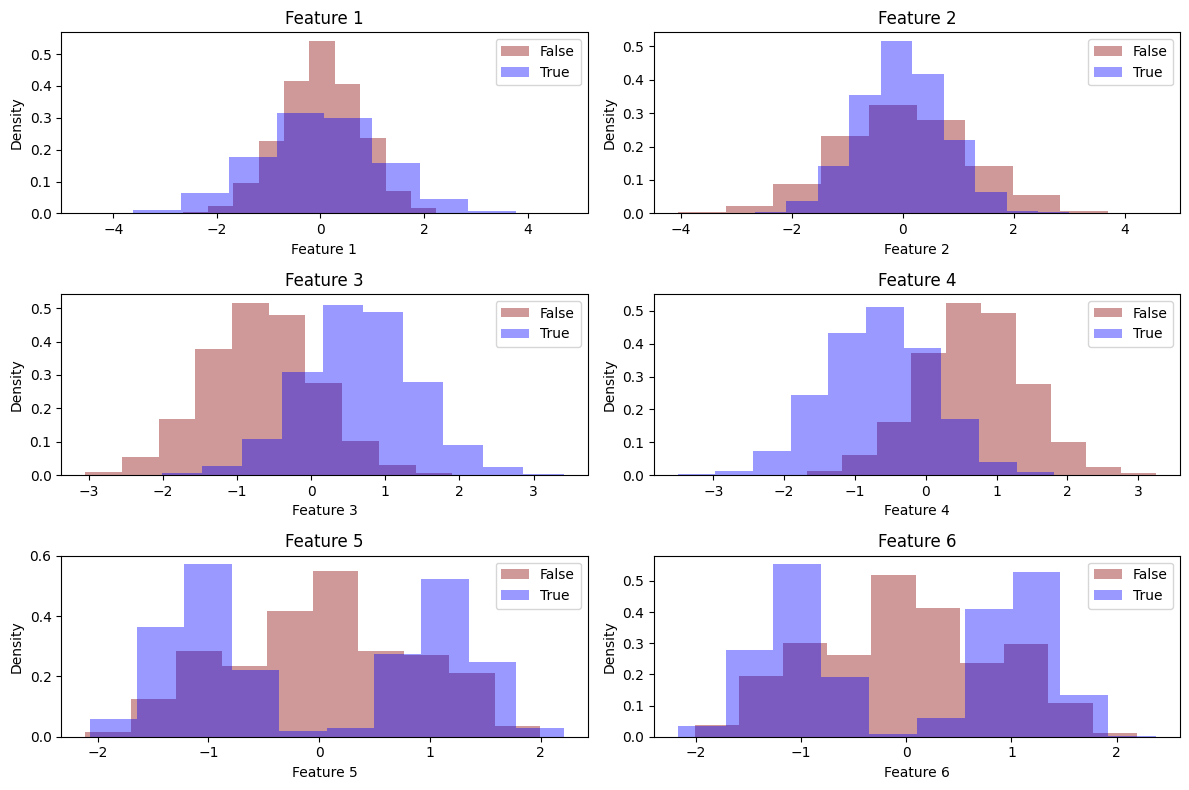

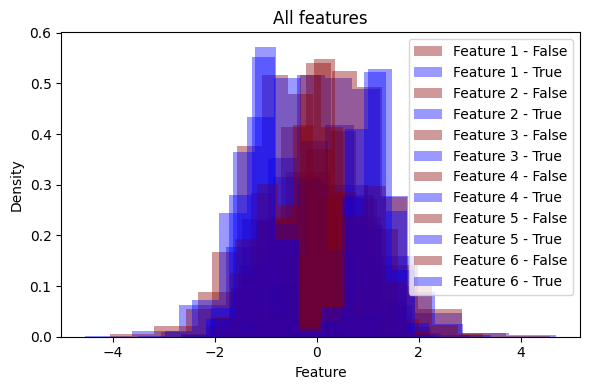

In [ ]:
# plot the data
fig, axes = plt.subplots(3, 2, figsize=(12, 8))  # 3 rows, 2 columns
labels = ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5", "Feature 6"]
colors = ["darkRed", "blue"]
leg = ["False", "True"]

for i, ax in enumerate(axes.flat):
    ax.set_title(labels[i])  # Add title with the feature name
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Density")
    for j in range(2):
        ax.hist(Dp[i, Lp == j], bins=10, density=True, alpha=0.4, label=leg[j], color=colors[j])
    ax.legend()

plt.tight_layout()
plt.show()

# plot every feature in a single plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title("All features")
ax.set_xlabel("Feature")
ax.set_ylabel("Density")
for i in range(6):
    for j in range(2):
        ax.hist(Dp[i, Lp == j], bins=10, density=True, alpha=0.5, label=f"{labels[i]} - {leg[j]}", color=colors[j])
ax.legend()
plt.tight_layout()
plt.show()



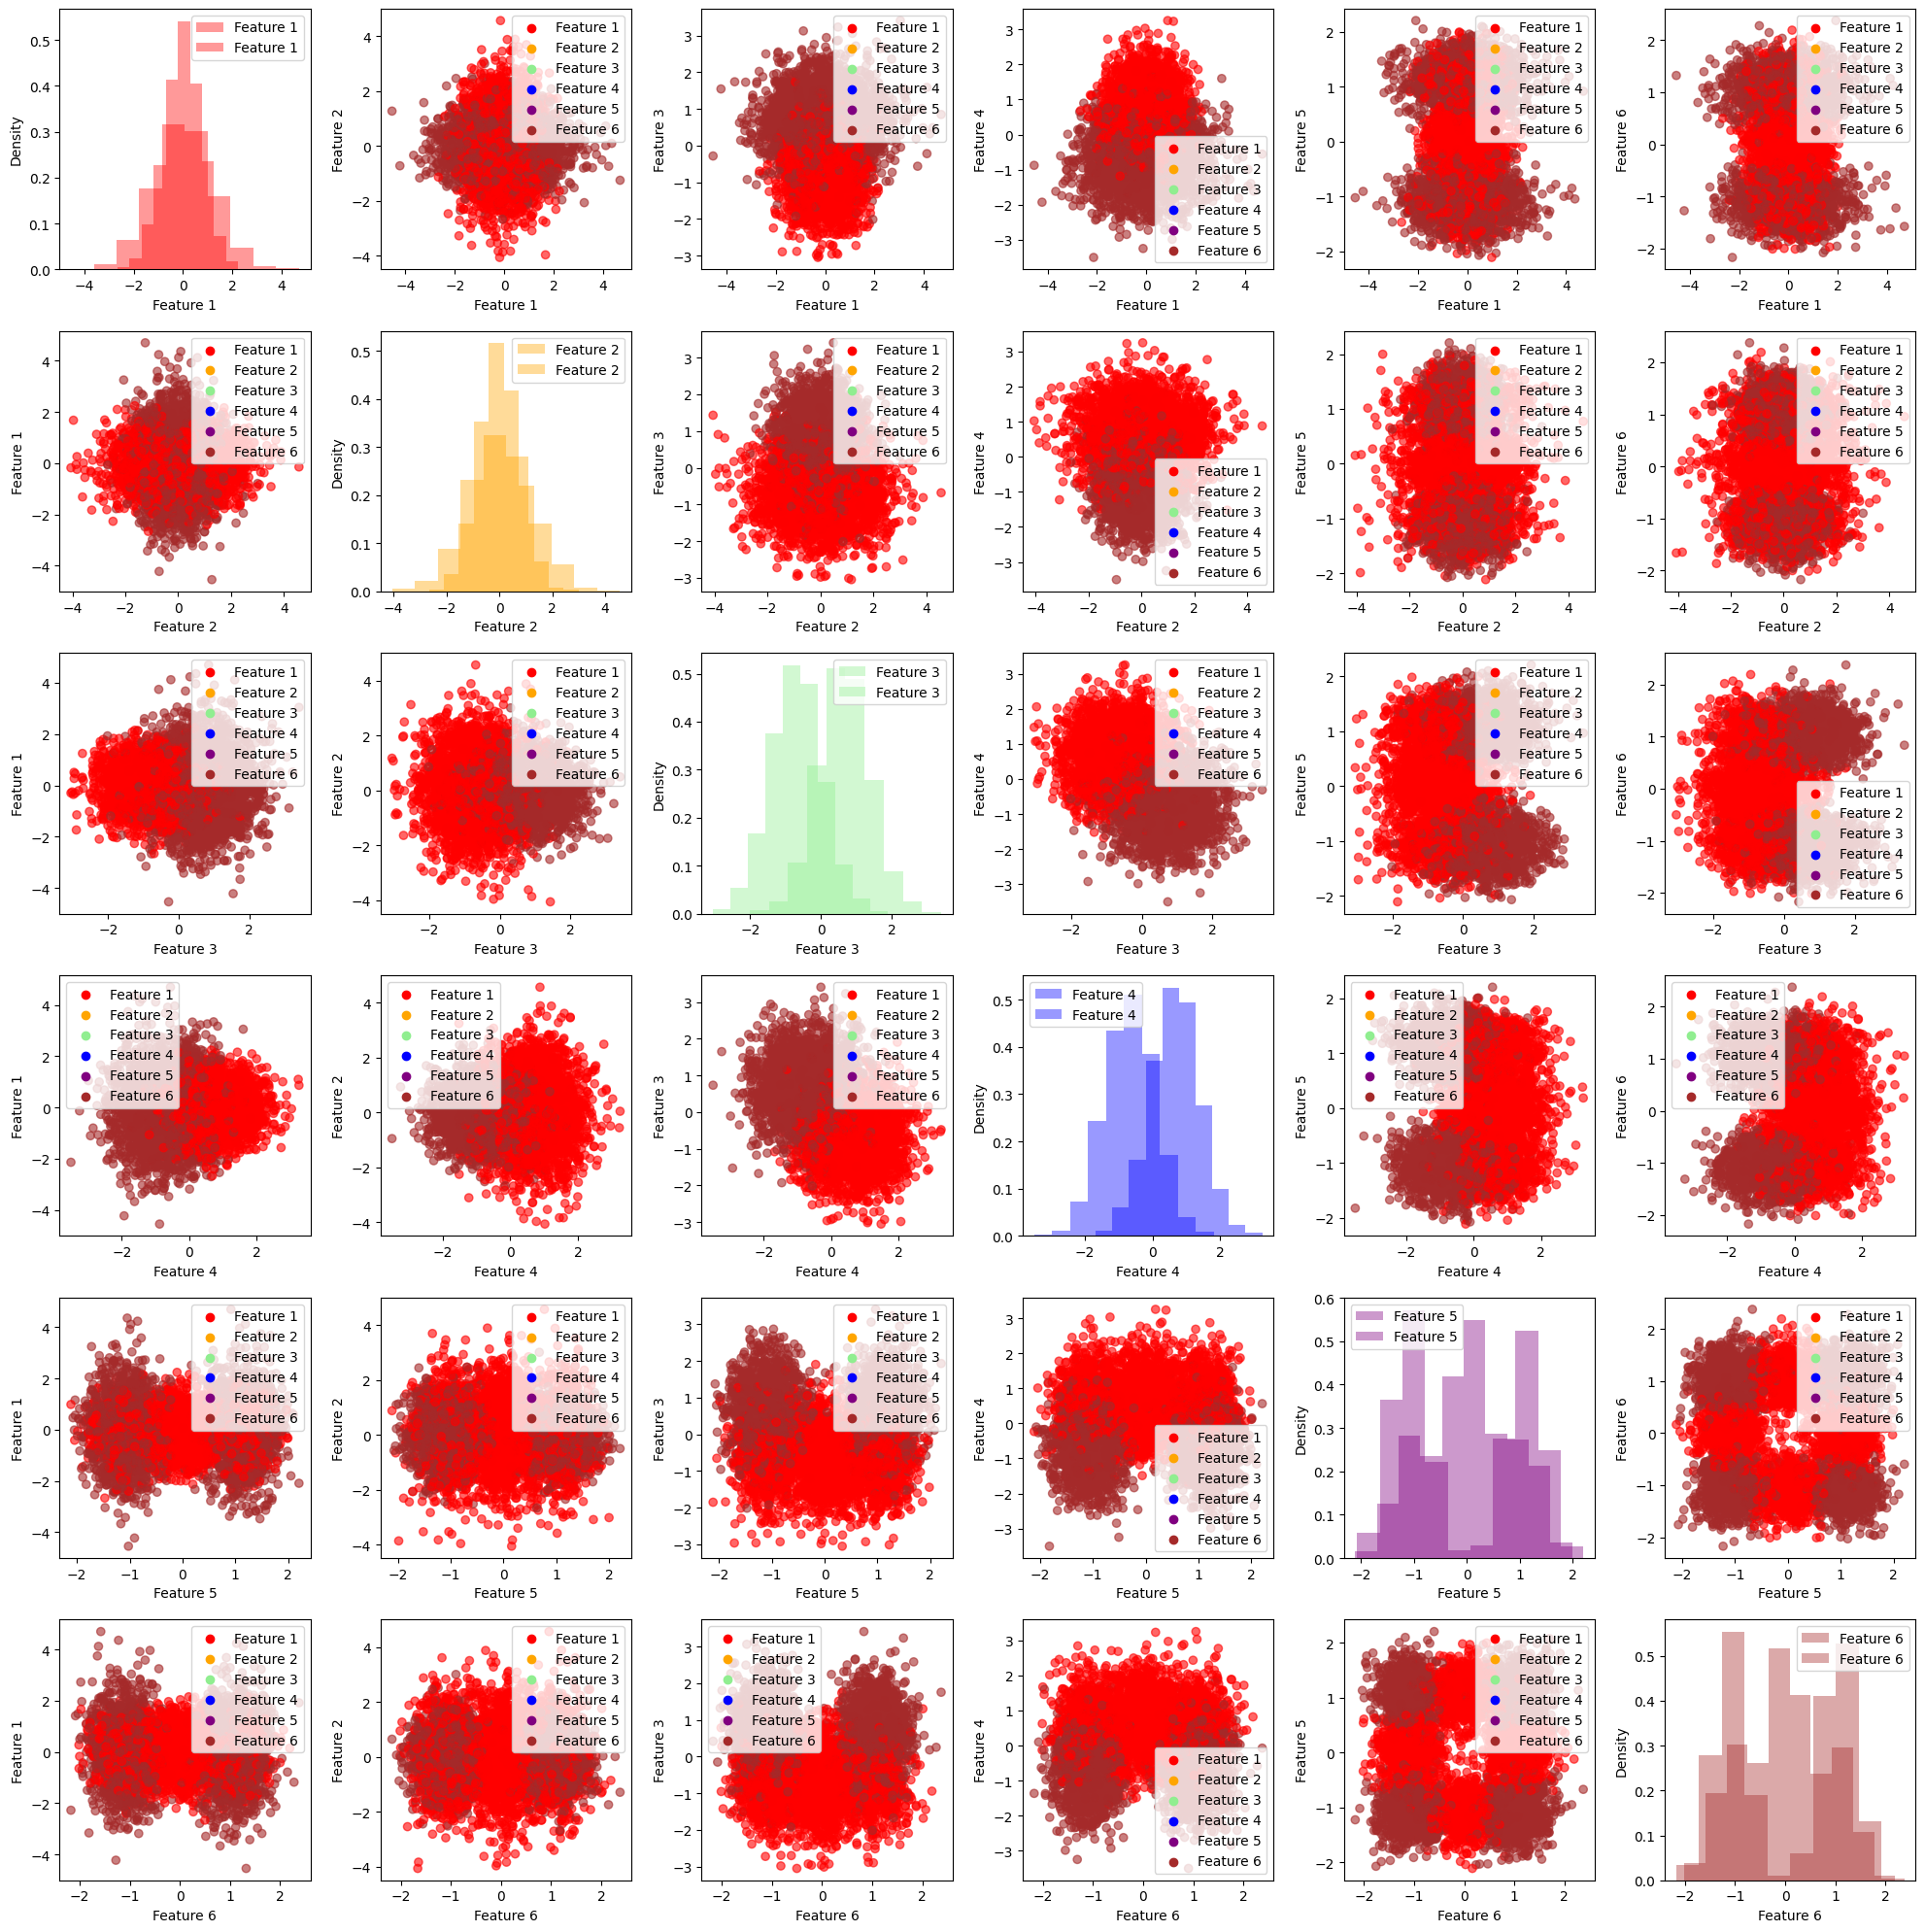

In [78]:
fig, axes = plt.subplots(6, 6, figsize=(20, 20))  # 6 rows, 6 columns

for i in range(6):
    for j in range(6):
        if i != j:
            axes[i, j].scatter(Dp[i, :], Dp[j, :], c=Lp, cmap=mpl.colors.ListedColormap(colors), alpha=0.6)
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel(labels[j])
            # add legend to scatter plot with the values of labels array
            for k in range(6):
                axes[i, j].scatter([], [], c=colors[k], label=f'Feature {k+1}')
        else:
            for k in range(2):
                axes[i, j].hist(Dp[i, Lp == k], bins=10, density=True, alpha=0.4, label=f'Feature {i+1}', color=colors[i])
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel("Density")
        axes[i, j].legend()

plt.tight_layout()
plt.show()
